In [23]:
##Import Libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import missingno as msno #

In [24]:
df1 = pd.DataFrame(pd.read_csv('/Users/arnenyeck/Desktop/MSU/CIS 518- Foundation of data science/Covid-group-project/Coviddata1.csv'))

In [25]:
df1

,location,date,total_cases_per_million,total_deaths_per_million,reproduction_per_million,icu_patients_per_million,hosp_patients_per_million,total_tests,total_vaccinations,people_vaccinated_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,human_development_index,excess_mortality_cumulative_per_million
0,Afghanistan,8/1/21,3702.759,169.121,7.300000e-07,NaN,NaN,NaN,NaN,NaN,...,1803.987,NaN,0.000597,0.000010,NaN,NaN,37.746,5.000000e-07,0.511,NaN
1,Albania,8/1/21,46336.254,855.223,1.720000e-06,NaN,NaN,0.863664,1.203087,0.672765,...,11803.431,1.100000e-06,0.000304,0.000010,7.100000e-06,0.000051,NaN,2.890000e-06,0.795,NaN
2,Algeria,8/1/21,3867.706,96.175,1.000000e-06,0.852,NaN,NaN,NaN,NaN,...,13913.839,5.000000e-07,0.000278,0.000007,7.000000e-07,0.000030,83.741,1.900000e-06,0.748,NaN
3,Andorra,8/1/21,189751.015,1654.730,9.800000e-07,NaN,NaN,NaN,0.086320,0.050747,...,NaN,NaN,0.000109,0.000008,2.900000e-05,0.000038,NaN,NaN,0.868,NaN
4,Angola,8/1/21,1261.728,29.941,1.000000e-06,NaN,NaN,NaN,NaN,NaN,...,5819.495,NaN,0.000276,0.000004,NaN,NaN,26.664,NaN,0.581,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Vietnam,8/1/21,1604.450,13.304,1.280000e-06,NaN,NaN,NaN,6.415219,5.756155,...,6171.884,2.000000e-06,0.000245,0.000006,1.000000e-06,0.000046,85.847,2.600000e-06,0.704,NaN
231,Wallis and Futuna,8/1/21,40923.021,630.972,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,Yemen,8/1/21,231.874,45.161,1.360000e-06,NaN,NaN,NaN,NaN,NaN,...,1479.147,1.880000e-05,0.000495,0.000005,7.600000e-06,0.000029,49.542,7.000000e-07,0.470,NaN
233,Zambia,8/1/21,10374.534,180.015,7.300000e-07,NaN,NaN,2.095606,0.438885,0.285288,...,3689.251,5.750000e-05,0.000234,0.000004,3.100000e-06,0.000025,13.938,2.000000e-06,0.584,NaN


In [7]:
df1.shape

(235, 27)

In [8]:
df1.dtypes ##Check the datatype for each column

location                                    object
date                                        object
total_cases_per_million                    float64
total_deaths_per_million                   float64
reproduction_per_million                   float64
icu_patients_per_million                   float64
hosp_patients_per_million                  float64
total_tests                                float64
total_vaccinations                         float64
people_vaccinated_per_million              float64
people_vaccinated                          float64
total_boosters                             float64
stringency_index                           float64
vaccination_rates                          float64
vaccination_result                          object
population                                 float64
aged_65_older                              float64
gdp_per_capita                             float64
extreme_poverty                            float64
cardiovasc_death_rate          

In [9]:
df1.isna().sum()

location                                     0
date                                         0
total_cases_per_million                     16
total_deaths_per_million                    31
reproduction_per_million                    51
icu_patients_per_million                   199
hosp_patients_per_million                  200
total_tests                                147
total_vaccinations                         130
people_vaccinated_per_million              132
people_vaccinated                          132
total_boosters                             209
stringency_index                            50
vaccination_rates                          132
vaccination_result                         132
population                                   2
aged_65_older                               44
gdp_per_capita                              41
extreme_poverty                            106
cardiovasc_death_rate                       42
diabetes_prevalence                         32
female_smoker

<AxesSubplot:>

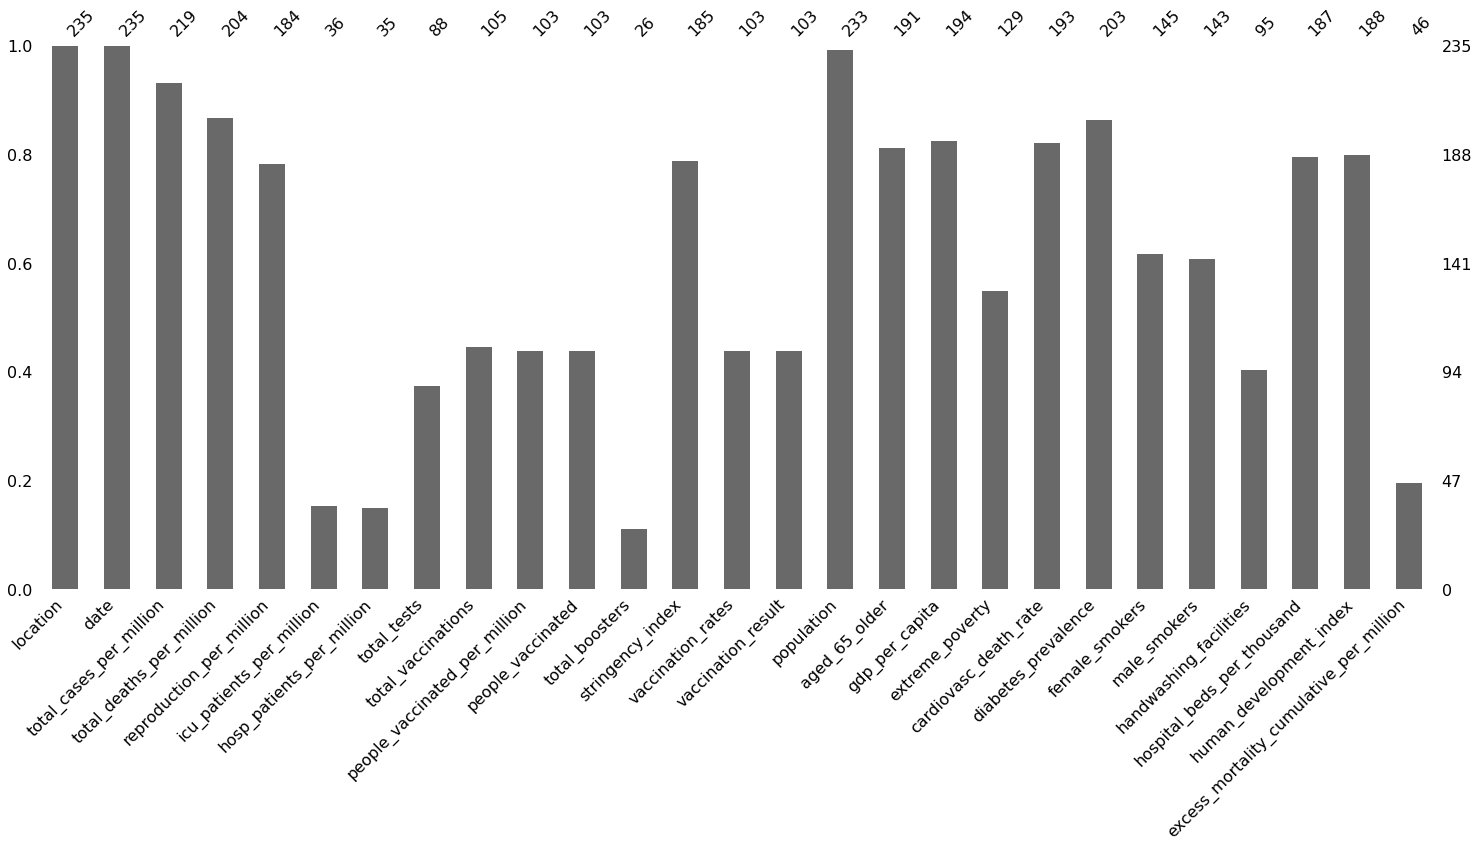

In [10]:
msno.bar(df1)

In [11]:
df1.fillna(value = 0,
          inplace = True)

<AxesSubplot:>

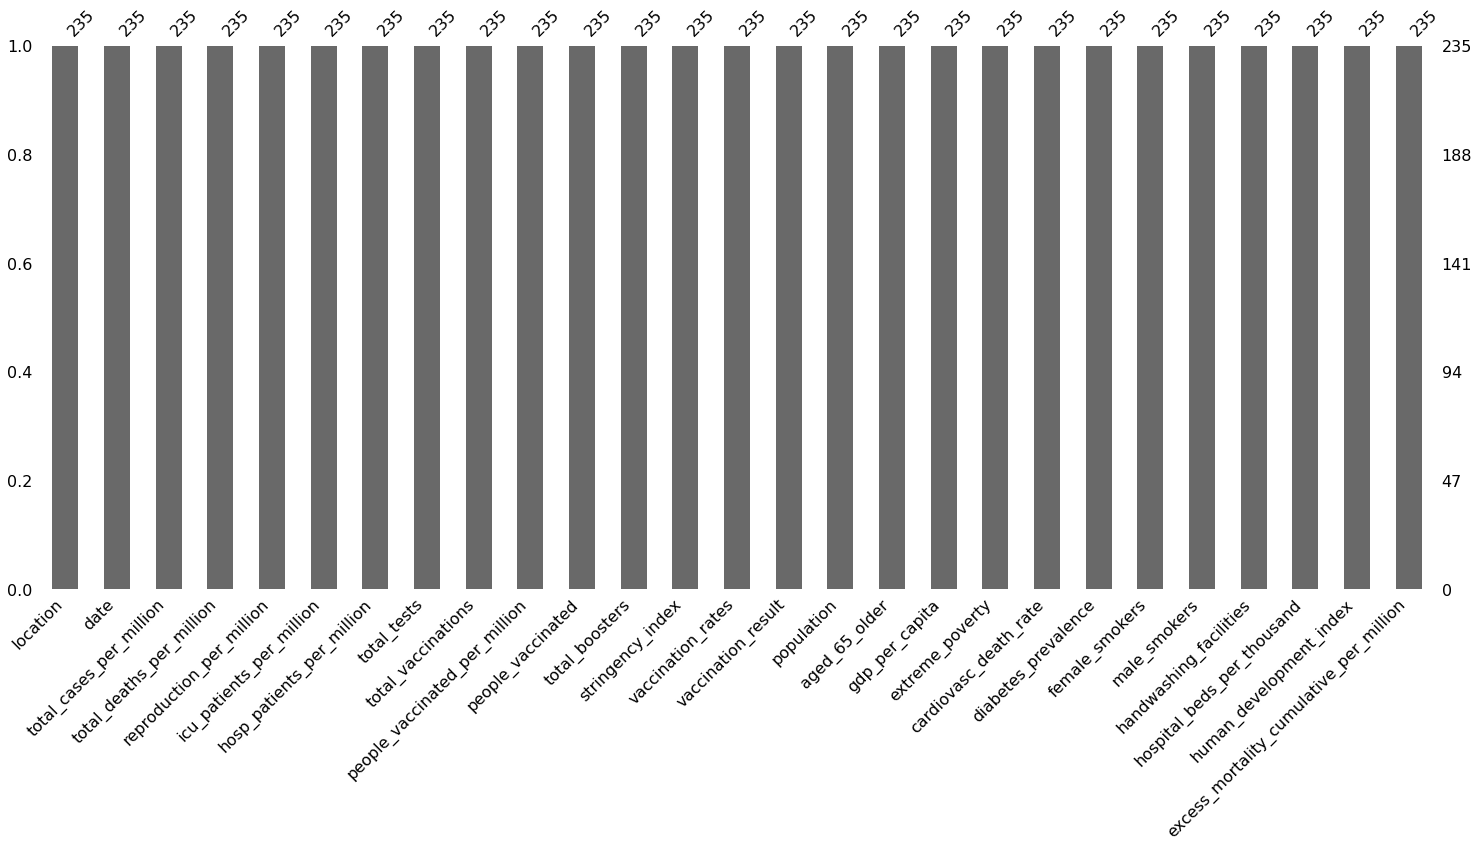

In [12]:
msno.bar(df1)

In [13]:
df1.duplicated().sum()

0

In [14]:
#Function to select highly correlated data features
#The function below will list out features that are highly correlated with eachother
def high_corr(dataset,threshold):
    col_corr =  set() #Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i] #getting the names of the columns
                col_corr.add(colname)
    return col_corr

In [15]:
corr_features = high_corr(df1,0.7)
len(set(corr_features))

4

In [16]:
corr_features

{'people_vaccinated',
 'people_vaccinated_per_million',
 'population',
 'total_deaths_per_million'}

In [19]:
X= df1.drop(["location","date","people_vaccinated","people_vaccinated_per_million",
            "population","total_deaths_per_million"],axis = 1)

In [20]:
X.corr()

,total_cases_per_million,reproduction_per_million,icu_patients_per_million,hosp_patients_per_million,total_tests,total_vaccinations,total_boosters,stringency_index,vaccination_rates,aged_65_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,human_development_index,excess_mortality_cumulative_per_million
total_cases_per_million,1.000000,0.248950,0.278770,0.244538,0.157246,0.001619,0.036535,0.080413,0.442522,0.419138,0.359197,-0.309612,-0.163110,0.052698,0.501301,0.265474,-0.136467,0.310969,0.319938,0.374368
reproduction_per_million,0.248950,1.000000,0.087185,0.141787,0.129083,-0.086041,-0.057727,0.507605,0.214739,0.428690,0.216307,0.068603,0.362998,0.035299,0.302839,0.432134,0.193734,0.429643,0.680495,0.218123
icu_patients_per_million,0.278770,0.087185,1.000000,0.587547,0.260156,0.014054,-0.024090,0.162376,0.279967,0.256133,0.192895,-0.094277,-0.083579,0.028142,0.315760,0.165683,-0.141127,0.141489,0.216153,0.168280
hosp_patients_per_million,0.244538,0.141787,0.587547,1.000000,0.247834,0.004486,-0.023193,0.120976,0.202952,0.290266,0.211187,-0.096965,-0.037614,0.066124,0.270661,0.191055,-0.124242,0.139115,0.219220,0.203288
total_tests,0.157246,0.129083,0.260156,0.247834,1.000000,0.157035,0.039437,0.136803,0.237654,0.202044,0.187321,-0.027040,-0.047056,0.047524,0.170233,0.078313,-0.028398,0.062845,0.171209,0.162855
total_vaccinations,0.001619,-0.086041,0.014054,0.004486,0.157035,1.000000,0.604341,-0.068112,0.130971,-0.046621,-0.048538,-0.063376,-0.133639,-0.104033,-0.051579,-0.027177,-0.081014,-0.035199,-0.119045,-0.018316
total_boosters,0.036535,-0.057727,-0.024090,-0.023193,0.039437,0.604341,1.000000,-0.080140,0.138412,-0.062294,-0.031249,-0.050888,-0.109178,-0.052748,-0.008735,-0.021133,-0.066919,-0.046554,-0.083981,-0.038842
stringency_index,0.080413,0.507605,0.162376,0.120976,0.136803,-0.068112,-0.080140,1.000000,0.199180,0.236178,0.188181,0.055800,0.331472,0.137219,0.113131,0.405455,0.289506,0.220723,0.552456,0.078542
vaccination_rates,0.442522,0.214739,0.279967,0.202952,0.237654,0.130971,0.138412,0.199180,1.000000,0.519800,0.479965,-0.269253,-0.191562,-0.020074,0.448794,0.238141,-0.108568,0.293165,0.391182,0.308736
aged_65_older,0.419138,0.428690,0.256133,0.290266,0.202044,-0.046621,-0.062294,0.236178,0.519800,1.000000,0.489820,-0.241615,0.060910,0.128165,0.673050,0.419414,-0.087964,0.590752,0.608745,0.424145


In [28]:
y = df1["vaccination_result"]

In [29]:
y

0           NaN
1      very low
2           NaN
3          high
4           NaN
         ...   
230    very low
231         NaN
232         NaN
233    very low
234         NaN
Name: vaccination_result, Length: 235, dtype: object

In [30]:
#Separate datasets into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_test,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)
X_train.shape , X_test.shape

((164, 21), (71, 21))

In [31]:
## FEATURE SELECTION USING WRAPPER METHOD forward selection and backward elimination
from sklearn.linear_model import LinearRegression

In [32]:
lr = LinearRegression() #Instantiate the model

In [33]:
from mlxtend.feature_selection import SequentialFeatureSelector #library for forward and backward 

In [34]:
sfs =  SequentialFeatureSelector(lr,k_features=10, forward = True, scoring = "accuracy") #instantiate the feature selection model

In [35]:
sfs.fit(X,y)

/Users/arnenyeck/Desktop/Repositories/machine_learning/sample_project/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/arnenyeck/Desktop/Repositories/machine_learning/sample_project/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/arnenyeck/Desktop/Repositories/machine_learning/sample_project/env/lib/python3.8/site-packages/sklearn/linear_model/_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "/Users/arnenyeck/Desktop/Repositories/machine_learning/sample_project/env/lib/python3.8/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/arnenyeck/Desktop/Rep

/Users/arnenyeck/Desktop/Repositories/machine_learning/sample_project/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/arnenyeck/Desktop/Repositories/machine_learning/sample_project/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/arnenyeck/Desktop/Repositories/machine_learning/sample_project/env/lib/python3.8/site-packages/sklearn/linear_model/_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "/Users/arnenyeck/Desktop/Repositories/machine_learning/sample_project/env/lib/python3.8/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/arnenyeck/Desktop/Rep

/Users/arnenyeck/Desktop/Repositories/machine_learning/sample_project/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/arnenyeck/Desktop/Repositories/machine_learning/sample_project/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/arnenyeck/Desktop/Repositories/machine_learning/sample_project/env/lib/python3.8/site-packages/sklearn/linear_model/_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "/Users/arnenyeck/Desktop/Repositories/machine_learning/sample_project/env/lib/python3.8/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/arnenyeck/Desktop/Rep

/Users/arnenyeck/Desktop/Repositories/machine_learning/sample_project/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/arnenyeck/Desktop/Repositories/machine_learning/sample_project/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/arnenyeck/Desktop/Repositories/machine_learning/sample_project/env/lib/python3.8/site-packages/sklearn/linear_model/_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "/Users/arnenyeck/Desktop/Repositories/machine_learning/sample_project/env/lib/python3.8/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/arnenyeck/Desktop/Rep

/Users/arnenyeck/Desktop/Repositories/machine_learning/sample_project/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/arnenyeck/Desktop/Repositories/machine_learning/sample_project/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/arnenyeck/Desktop/Repositories/machine_learning/sample_project/env/lib/python3.8/site-packages/sklearn/linear_model/_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "/Users/arnenyeck/Desktop/Repositories/machine_learning/sample_project/env/lib/python3.8/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/arnenyeck/Desktop/Rep

/Users/arnenyeck/Desktop/Repositories/machine_learning/sample_project/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/arnenyeck/Desktop/Repositories/machine_learning/sample_project/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/arnenyeck/Desktop/Repositories/machine_learning/sample_project/env/lib/python3.8/site-packages/sklearn/linear_model/_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "/Users/arnenyeck/Desktop/Repositories/machine_learning/sample_project/env/lib/python3.8/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/arnenyeck/Desktop/Rep

/Users/arnenyeck/Desktop/Repositories/machine_learning/sample_project/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/arnenyeck/Desktop/Repositories/machine_learning/sample_project/env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/arnenyeck/Desktop/Repositories/machine_learning/sample_project/env/lib/python3.8/site-packages/sklearn/linear_model/_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "/Users/arnenyeck/Desktop/Repositories/machine_learning/sample_project/env/lib/python3.8/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/arnenyeck/Desktop/Rep

SequentialFeatureSelector(estimator=LinearRegression(), k_features=10,
                          scoring='accuracy')

In [52]:
sfs.k_feature_names_

('total_cases_per_million',
 'reproduction_per_million',
 'icu_patients_per_million',
 'hosp_patients_per_million',
 'total_tests',
 'total_vaccinations',
 'total_boosters',
 'stringency_index',
 'vaccination_rates',
 'aged_65_older')

In [36]:
df1

,location,date,total_cases_per_million,total_deaths_per_million,reproduction_per_million,icu_patients_per_million,hosp_patients_per_million,total_tests,total_vaccinations,people_vaccinated_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,human_development_index,excess_mortality_cumulative_per_million
0,Afghanistan,8/1/21,3702.759,169.121,7.300000e-07,NaN,NaN,NaN,NaN,NaN,...,1803.987,NaN,0.000597,0.000010,NaN,NaN,37.746,5.000000e-07,0.511,NaN
1,Albania,8/1/21,46336.254,855.223,1.720000e-06,NaN,NaN,0.863664,1.203087,0.672765,...,11803.431,1.100000e-06,0.000304,0.000010,7.100000e-06,0.000051,NaN,2.890000e-06,0.795,NaN
2,Algeria,8/1/21,3867.706,96.175,1.000000e-06,0.852,NaN,NaN,NaN,NaN,...,13913.839,5.000000e-07,0.000278,0.000007,7.000000e-07,0.000030,83.741,1.900000e-06,0.748,NaN
3,Andorra,8/1/21,189751.015,1654.730,9.800000e-07,NaN,NaN,NaN,0.086320,0.050747,...,NaN,NaN,0.000109,0.000008,2.900000e-05,0.000038,NaN,NaN,0.868,NaN
4,Angola,8/1/21,1261.728,29.941,1.000000e-06,NaN,NaN,NaN,NaN,NaN,...,5819.495,NaN,0.000276,0.000004,NaN,NaN,26.664,NaN,0.581,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Vietnam,8/1/21,1604.450,13.304,1.280000e-06,NaN,NaN,NaN,6.415219,5.756155,...,6171.884,2.000000e-06,0.000245,0.000006,1.000000e-06,0.000046,85.847,2.600000e-06,0.704,NaN
231,Wallis and Futuna,8/1/21,40923.021,630.972,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
232,Yemen,8/1/21,231.874,45.161,1.360000e-06,NaN,NaN,NaN,NaN,NaN,...,1479.147,1.880000e-05,0.000495,0.000005,7.600000e-06,0.000029,49.542,7.000000e-07,0.470,NaN
233,Zambia,8/1/21,10374.534,180.015,7.300000e-07,NaN,NaN,2.095606,0.438885,0.285288,...,3689.251,5.750000e-05,0.000234,0.000004,3.100000e-06,0.000025,13.938,2.000000e-06,0.584,NaN


In [46]:
### Calculate variance
vrc = df1.var(numeric_only = True)
vrc

total_cases_per_million                    1.836469e+09
total_deaths_per_million                   7.328792e+05
reproduction_per_million                   9.942812e-14
icu_patients_per_million                   4.129241e+02
hosp_patients_per_million                  7.859669e+03
total_tests                                5.832341e+03
total_vaccinations                         9.377496e+04
people_vaccinated_per_million              1.859684e+04
people_vaccinated                          1.859684e+16
total_boosters                             2.056027e+00
stringency_index                           3.155102e+02
vaccination_rates                          5.281416e+02
population                                 9.922489e+16
aged_65_older                              3.764228e+01
gdp_per_capita                             4.189064e+08
extreme_poverty                            4.030864e-10
cardiovasc_death_rate                      1.490531e-08
diabetes_prevalence                        2.452

In [53]:
# ## Importing variance threshold and checking the variance threshold

from sklearn import preprocessing


In [56]:
label_encoder = preprocessing.LabelEncoder()
df1['location']= label_encoder.fit_transform(df1['location'])

In [58]:
from sklearn.feature_selection import VarianceThreshold


In [60]:
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(X_train)

ValueError: could not convert string to float: 'high'